# Import packages

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from load_clean_data import load_clean_data
%matplotlib inline

In [127]:
movie_data = load_clean_data()

In [128]:
movie_data = movie_data.dropna(subset=['genre'])

In [129]:
movie_data.columns

Index(['title', 'year', 'budget', 'rating', 'creative', 'source', 'genre',
       'time', 'profit'],
      dtype='object')

Text(0.5, 1.0, 'Profit')

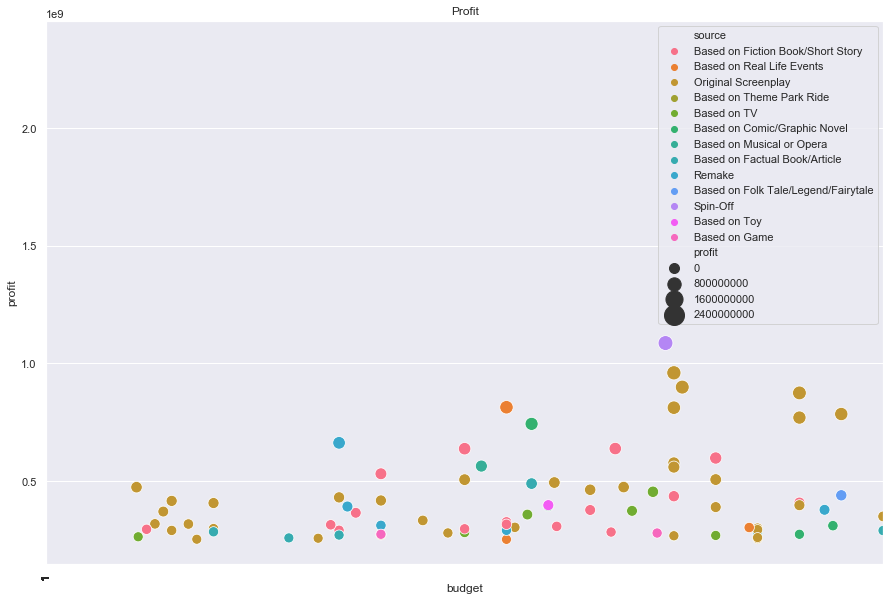

In [130]:
sns.set()

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

plt.xlim(1e5, 1e8)
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x='budget', y='profit',
                     hue='source', size='profit',
                     sizes=(100, 400),
                     data=movie_data.loc[movie_data['profit'] > 250e6])
plt.xticks(movie_data['budget'] > 1e6, rotation=90)
#ax.set(xlabel='Budget in USD$')
plt.title('Profit')

## Genre impact on Profit

In [99]:
genre_avg = movie_data.groupby('genre').agg('mean')
genre_avg = genre_avg.reset_index()
genre_avg.columns

Index(['genre', 'year', 'budget', 'time', 'profit'], dtype='object')

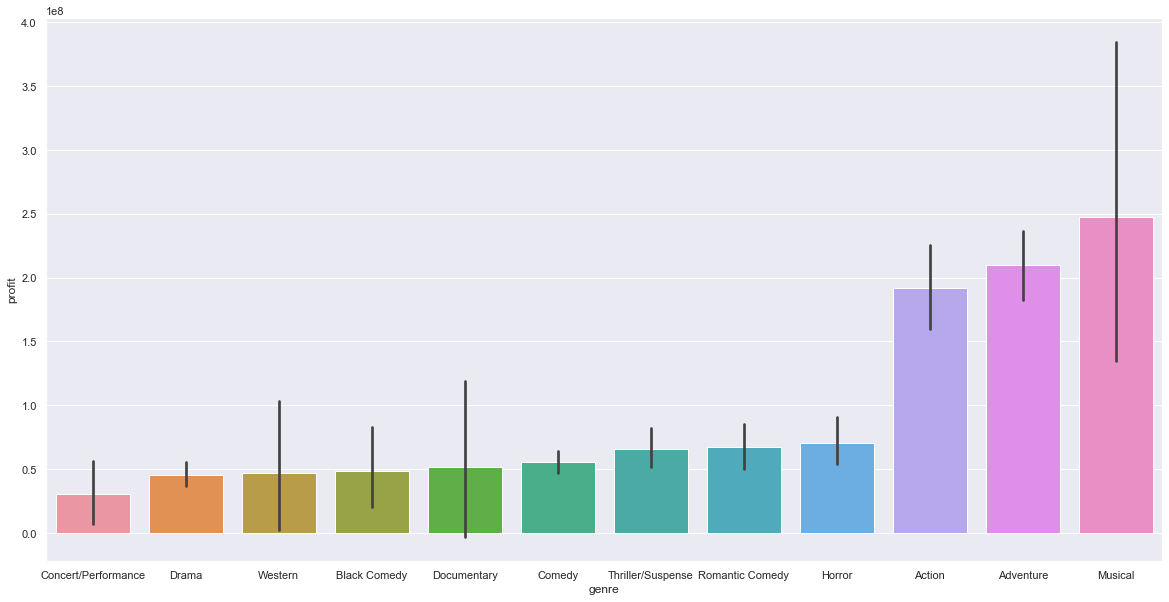

In [100]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='genre', y='profit', data=movie_data,order=genre_avg.sort_values('profit')['genre'])



## Source impact on Profit

In [101]:
source_avg = movie_data.groupby('source').agg('mean')
source_avg = source_avg.reset_index()
source_avg.columns

Index(['source', 'year', 'budget', 'time', 'profit'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

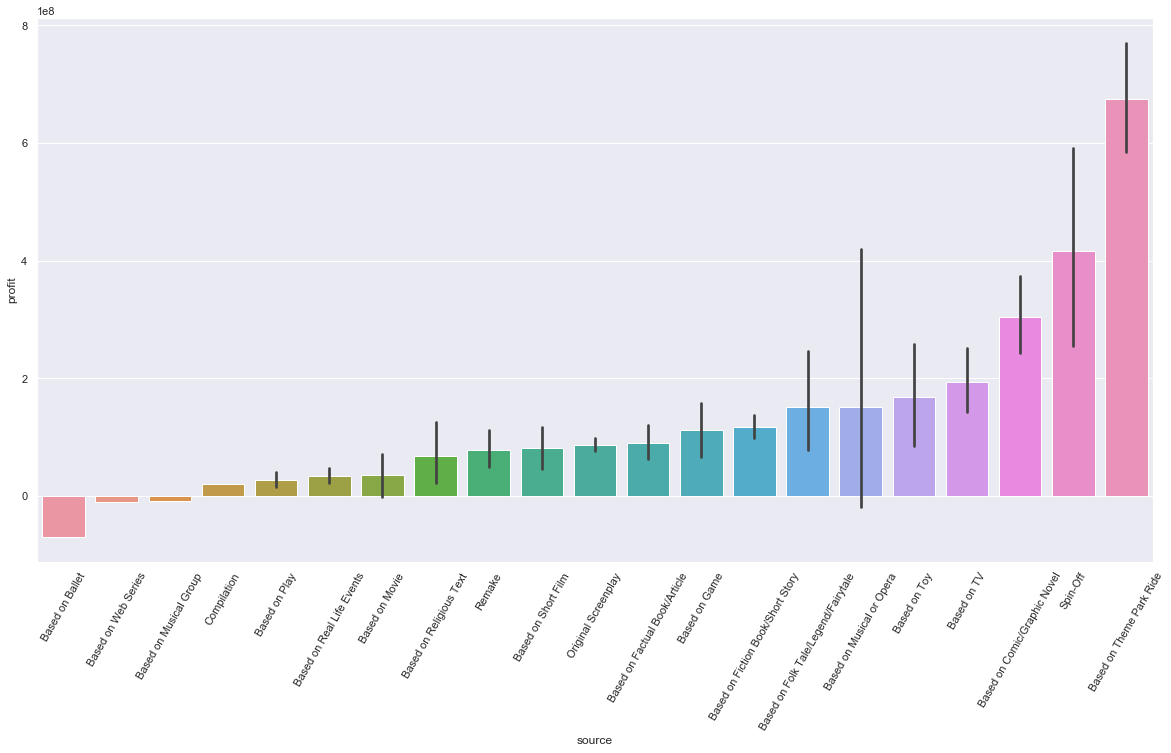

In [102]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='source', y='profit', data=movie_data, order=source_avg.sort_values('profit')['source'])
plt.xticks(rotation=60)

In [75]:
# sns.set_style("whitegrid")
# g = sns.lmplot(x="budget", y="profit", data=movie_data, aspect=2)
# g = (g.set_axis_labels("budget","Budget (USD)").set(xlim=(0,10),ylim=(0,100)))
                                                                                         
# plt.title("Movie")
# plt.show(g)

In [103]:
#fig = plt.figure(figsize=(20,10))
#fig, ax = plt.subplots(6,2)

#fig.set_size_inches(15, 10)

# sns.lmplot(x='budget',
#            y='profit', 
#            row='genre', 
#            data=movie_data)

In [ ]:
# fig, ax = plt.subplots()

# fig.set_size_inches(15, 10)

# sns.catplot(x="budget", y="profit",
#             kind="violin", split=True, data=movie_data);

## Rating impact on Profit

In [106]:
rating_avg = movie_data.groupby('rating').agg('mean')
rating_avg = rating_avg.reset_index()
rating_avg.columns

Index(['rating', 'year', 'budget', 'time', 'profit'], dtype='object')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

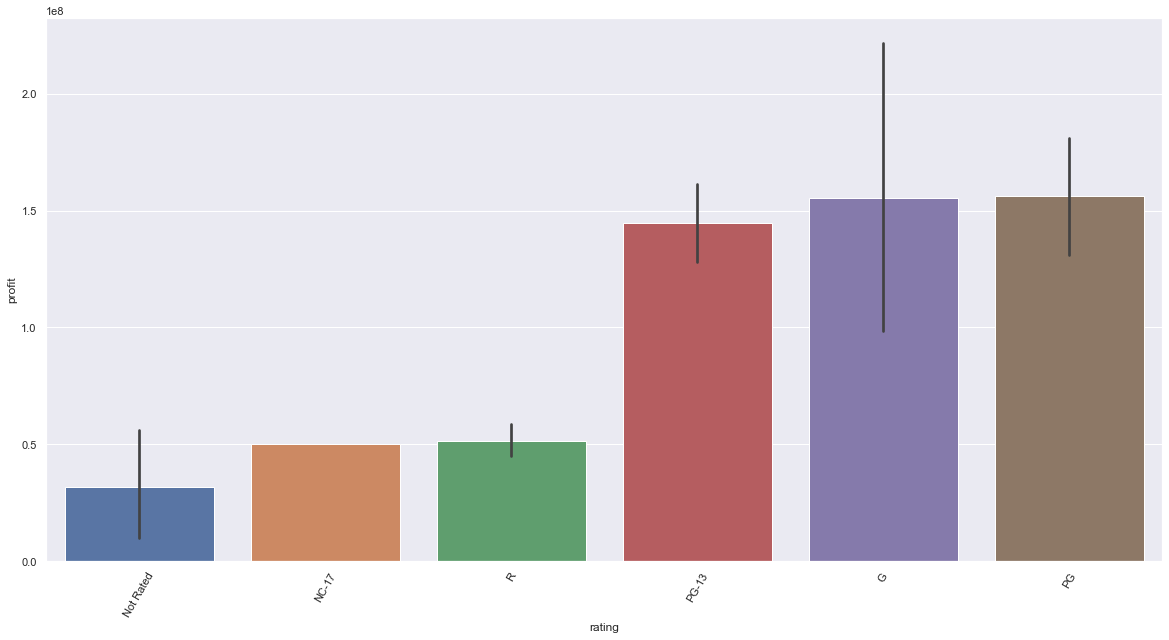

In [108]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='rating', y='profit', data=movie_data, order=rating_avg.sort_values('profit')['rating'])
plt.xticks(rotation=60)

## Runtime impact on Profit

In [109]:
time_avg = movie_data.groupby('time').agg('mean')
time_avg = time_avg.reset_index()
time_avg.columns

Index(['time', 'year', 'budget', 'profit'], dtype='object')

In [155]:
movie_data_sorted = movie_data.sort_values(by=['profit'],ascending=False)

/Users/z/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/z/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


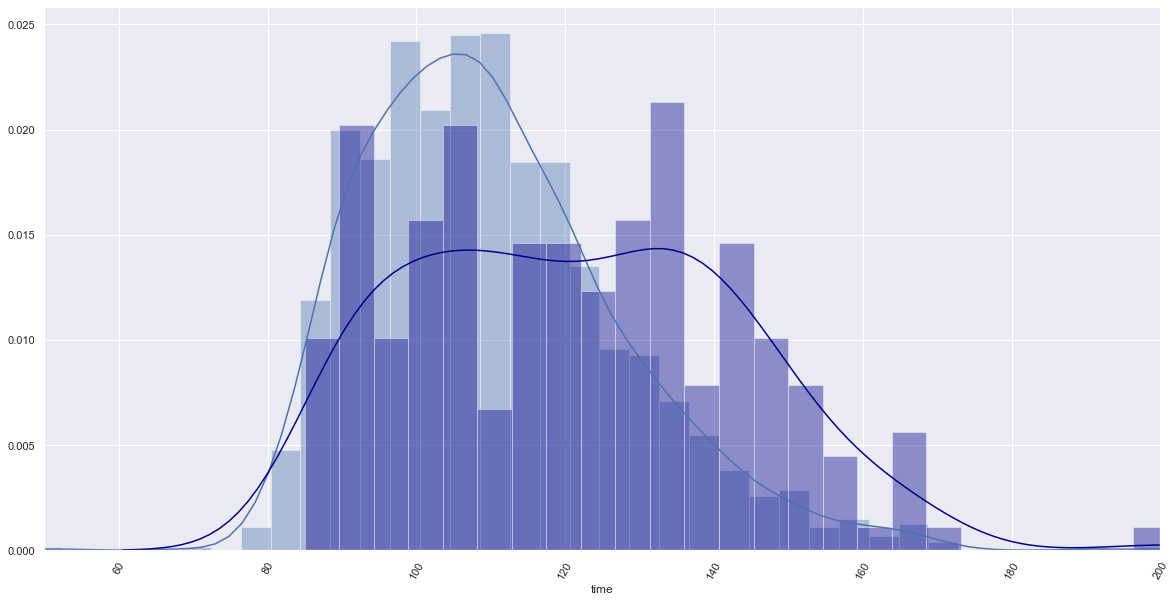

In [160]:
fig = plt.figure(figsize=(20,10))
ax = sns.distplot(movie_data['time'], bins=50, norm_hist=False,)
plt.xticks(rotation=60)
plt.xlim(50, 200)

ax = sns.distplot(movie_data_sorted.iloc[0:int(movie_data.shape[0]*0.1)]['time'], bins=25, color='darkblue', norm_hist=False,ax=ax)

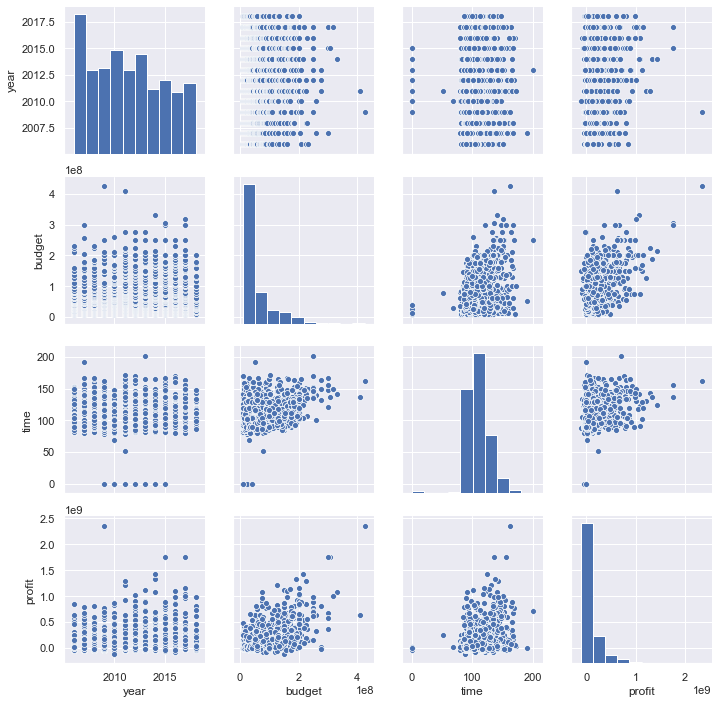

In [131]:
sns.pairplot(movie_data)